# Аналитика данных в маркетинге

## Загрузка библиотек и файлов

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import FactorAnalyzer
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_advertising_information = pd.read_json("Данные для кейса/Копия advertising_information.json")
df_advertising_information

,ad_channel,price
0,search,1.50
1,banner,0.50
2,video,0.75
3,native,2.00
4,partner_network,1.00
5,rich,2.50
6,organic_traffic,0.00
7,other,NaN


In [3]:
df_video = pd.read_csv("Данные для кейса/Копия video.csv")
df_video['ad_channel'] = 'video'
df_video

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,4,111649,consideration,150000,NaN,Android,video
1,6,793204,consideration,150000,NaN,Android,video
2,16,107750,interest,150001,NaN,Android,video
3,24,438176,interest,150001,NaN,Android,video
4,37,515596,consideration,150003,NaN,Android,video
...,...,...,...,...,...,...,...
655063,3837158,194420,interest,209673,NaN,Android,video
655064,3837163,851870,interest,209678,NaN,iOS,video
655065,3837185,3097,consideration,209722,NaN,Android,video
655066,3837223,343839,consideration,209782,NaN,Android,video


In [4]:
df_search =  pd.read_csv("Данные для кейса/Копия search.csv")
df_search['ad_channel'] = 'search'
df_search

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,0,387356,INTEREST,150000,NaN,iOS,search
1,2,619571,CONSIDERATION,150000,NaN,iOS,search
2,7,230119,INTEREST,150000,NaN,iOS,search
3,12,399556,INTEREST,150000,NaN,iOS,search
4,18,556959,INTEREST,150001,NaN,Android,search
...,...,...,...,...,...,...,...
1491200,3847428,501946,INTENT,224125,NaN,Android,search
1491201,3847429,749577,PURCHASE,224647,2136.0,iOS,search
1491202,3847430,929180,INTENT,224682,NaN,iOS,search
1491203,3847431,1034498,INTENT,225430,NaN,iOS,search


In [5]:
# добавление названий столбцов
df_partner_network =  pd.read_csv("Данные для кейса/Копия partner_network.csv", header=None)
df_partner_network.columns=['Unnamed: 0', 'user_id', 'funnel_stage', 'timestamp', 'profit', 'os']
df_partner_network['ad_channel'] ='partner_network'
df_partner_network

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,40,829539,interest,150003,NaN,iOS,partner_network
1,44,817640,interest,150003,NaN,Android,partner_network
2,46,890248,purchase,150003,2136.0,Android,partner_network
3,54,1050415,interest,150004,NaN,Android,partner_network
4,57,586829,interest,150004,NaN,iOS,partner_network
...,...,...,...,...,...,...,...
387425,3847369,574708,interest,218332,NaN,Android,partner_network
387426,3847371,820066,intent,218439,NaN,Android,partner_network
387427,3847414,1004601,interest,221745,NaN,iOS,partner_network
387428,3847416,545060,consideration,221843,NaN,iOS,partner_network


In [6]:
df_rich =  pd.read_excel("Данные для кейса/Копия rich.xlsx")
df_rich['ad_channel'] = 'rich'
df_rich

,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,263061,INTEREST,150020,NaN,iOS,rich
1,803654,CONSIDERATION,150041,NaN,iOS,rich
2,320634,INTEREST,150042,NaN,iOS,rich
3,654929,CONSIDERATION,150042,NaN,iOS,rich
4,401613,INTEREST,150045,NaN,iOS,rich
...,...,...,...,...,...,...
64083,941235,CONSIDERATION,214689,NaN,iOS,rich
64084,171926,INTEREST,215295,NaN,iOS,rich
64085,637233,INTEREST,216099,NaN,iOS,rich
64086,851160,INTEREST,216412,NaN,iOS,rich


In [7]:
df_other =  pd.read_csv("Данные для кейса/Копия other.csv")
df_other['ad_channel'] = 'other'
df_other

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,174,619081,consideration,150013,NaN,iOS,other
1,176,900637,consideration,150013,NaN,iOS,other
2,231,551565,interest,150017,NaN,iOS,other
3,291,1037574,interest,150023,NaN,Android,other
4,1193,1048472,interest,150047,NaN,Android,other
...,...,...,...,...,...,...,...
22583,3843894,551827,intent,212778,NaN,iOS,other
22584,3844697,357210,consideration,213933,NaN,Android,other
22585,3846704,655650,intent,216711,NaN,Android,other
22586,3846732,749522,interest,217120,NaN,Android,other


In [8]:
# добавление названий столбцов
df_organic_traffic =  pd.read_csv("Данные для кейса/Копия organic_traffic.csv", header=None)
df_organic_traffic.columns=['Unnamed: 0', 'user_id', 'funnel_stage', 'timestamp', 'profit', 'os']
df_organic_traffic['ad_channel'] ='organic_traffic'
df_organic_traffic

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,3,897013,interest,150000,NaN,Android,organic_traffic
1,8,242700,interest,150000,NaN,Android,organic_traffic
2,10,143856,interest,150000,NaN,Android,organic_traffic
3,15,26717,consideration,150000,NaN,Android,organic_traffic
4,17,286799,interest,150001,NaN,Android,organic_traffic
...,...,...,...,...,...,...,...
531579,3847419,750226,purchase,222773,260.0,Android,organic_traffic
531580,3847425,104960,purchase,223361,520.0,iOS,organic_traffic
531581,3847427,706604,intent,223417,NaN,iOS,organic_traffic
531582,3847432,947521,consideration,225482,NaN,Android,organic_traffic


In [9]:
df_native =  pd.read_csv("Данные для кейса/Копия native.csv")
df_native['ad_channel'] = 'native'
df_native

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,14,991236,interest,150000,NaN,Android,native
1,31,622708,interest,150002,NaN,iOS,native
2,36,334823,interest,150003,NaN,Android,native
3,60,699175,consideration,150004,NaN,iOS,native
4,132,855631,interest,150010,NaN,iOS,native
...,...,...,...,...,...,...,...
117570,3841166,1045450,consideration,211055,NaN,iOS,native
117571,3841787,783513,intent,211273,NaN,iOS,native
117572,3842433,292776,intent,211612,NaN,iOS,native
117573,3843071,815870,interest,211930,NaN,Android,native


In [10]:
df_banner =  pd.read_excel("Данные для кейса/Копия banner.xlsx")
df_banner['ad_channel'] = 'banner'
df_banner

,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,219687,interest,150000,NaN,Android,banner
1,335514,interest,150000,NaN,Android,banner
2,108759,interest,150000,NaN,Android,banner
3,795063,interest,150000,NaN,Android,banner
4,928373,interest,150000,NaN,iOS,banner
...,...,...,...,...,...,...
576164,591027,intent,218761,NaN,Android,banner
576165,452032,purchase,219803,260.0,Android,banner
576166,1009191,intent,220227,NaN,Android,banner
576167,861271,consideration,221756,NaN,iOS,banner


# Объединение данных в одну витрину

In [11]:
# объединение данных из файлов с одинаковым количеством столбцов
df = pd.concat([df_video, df_search, df_partner_network, df_organic_traffic, df_other, df_native], axis=0, join='outer')
df

,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,4,111649,consideration,150000,NaN,Android,video
1,6,793204,consideration,150000,NaN,Android,video
2,16,107750,interest,150001,NaN,Android,video
3,24,438176,interest,150001,NaN,Android,video
4,37,515596,consideration,150003,NaN,Android,video
...,...,...,...,...,...,...,...
117570,3841166,1045450,consideration,211055,NaN,iOS,native
117571,3841787,783513,intent,211273,NaN,iOS,native
117572,3842433,292776,intent,211612,NaN,iOS,native
117573,3843071,815870,interest,211930,NaN,Android,native


In [12]:
# удаление ненужного столбца
df.pop('Unnamed: 0')

0               4
1               6
2              16
3              24
4              37
           ...   
117570    3841166
117571    3841787
117572    3842433
117573    3843071
117574    3843118
Name: Unnamed: 0, Length: 3205450, dtype: int64

In [13]:
# объединение данных оставшихся файлов
df_all = pd.concat([df, df_rich, df_banner], axis=0, join='outer')
df_all

,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,111649,consideration,150000,NaN,Android,video
1,793204,consideration,150000,NaN,Android,video
2,107750,interest,150001,NaN,Android,video
3,438176,interest,150001,NaN,Android,video
4,515596,consideration,150003,NaN,Android,video
...,...,...,...,...,...,...
576164,591027,intent,218761,NaN,Android,banner
576165,452032,purchase,219803,260.0,Android,banner
576166,1009191,intent,220227,NaN,Android,banner
576167,861271,consideration,221756,NaN,iOS,banner


In [14]:
# добавление столбца price из файла advertising_information в итоговый датафрейм, 
# приведение данных к нужной структуре и сортировка по столбцу timestamp
df_end = pd.merge(left=df_all, right=df_advertising_information, on='ad_channel', how= 'inner')
df_end = df_end[['user_id', 'ad_channel', 'funnel_stage', 'price', 'profit', 'os', 'timestamp']]
df_end = df_end.sort_values(by=['timestamp'] , ascending=True)
df_end['funnel_stage'] = df_end['funnel_stage'].apply(lambda x: x.lower())


# Итоговый набор данных

In [15]:
df_end

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
0,111649,video,consideration,0.75,NaN,Android,150000
655070,230119,search,interest,1.50,NaN,iOS,150000
655071,399556,search,interest,1.50,NaN,iOS,150000
655069,619571,search,consideration,1.50,NaN,iOS,150000
2533703,897013,organic_traffic,interest,0.00,NaN,Android,150000
...,...,...,...,...,...,...,...
2146270,929180,search,intent,1.50,NaN,iOS,224682
2146271,1034498,search,intent,1.50,NaN,iOS,225430
3065285,947521,organic_traffic,consideration,0.00,NaN,Android,225482
3065286,720354,organic_traffic,purchase,0.00,50.0,Android,225495


## Пропущенные значения

In [16]:
missing_values = ((df_end.isna().sum()/len(df_end))*100).sort_values()
print(f'Процент пропущенных значений: \n{missing_values}')

Процент пропущенных значений: 
user_id          0.000000
ad_channel       0.000000
funnel_stage     0.000000
os               0.000000
timestamp        0.000000
price            0.587356
profit          99.873183
dtype: float64


In [17]:
df_end['profit'] = df_end.profit.fillna(0)

In [18]:
# поскольку канал other не оплачивается, то ставится значение 0
df_end['price'] = df_end.price.fillna(0)
# пропущенных значений нет
df_end[df_end.isnull()].sum()

user_id         0.0
ad_channel        0
funnel_stage      0
price           0.0
profit          0.0
os                0
timestamp       0.0
dtype: object

# Количество уникальных пользователей, пришедших по рекламным каналам в разрезе этапов воронки продаж

In [19]:
# сомнения вызывает каналы search и video
stat_df_end  = df_end.drop(columns=['timestamp', 'os', 'price', 'profit']).groupby(['ad_channel', 'funnel_stage']).nunique()
stat_df_end

user_id
ad_channel      funnel_stage          
banner          consideration    47541
                intent            7625
                interest         92003
                purchase           688
native          consideration    12597
                intent             412
                interest         19381
                purchase            37
organic_traffic consideration    53592
                intent            9163
                interest         78707
                purchase           542
other           consideration     1813
                intent             232
                interest          3216
                purchase            43
partner_network consideration    24721
                intent            4420
                interest         66234
                purchase           450
rich            consideration     4657
                intent            1238
                interest          8922
                purchase            22
search          consideration   134305
                intent           27481
                interest        224668
                purchase          3090
video           consideration    60880
                intent              58
                interest         97961
                purchase             5

# Поиск фродовых данных

In [20]:
# подсчет числа действий пользователей в один момент времени
ds = df_end.drop(columns=['price', 'os','ad_channel', 'funnel_stage']).groupby(['timestamp', 'user_id']).count()
ds.sort_values(by=['profit'], ascending=False)

profit
timestamp user_id        
160430    485025      599
159478    877835      599
182162    725537      599
178892    392056      599
171864    47751       599
...                   ...
168850    215811        1
          226694        1
          246178        1
          250607        1
225688    151184        1

[991900 rows x 1 columns]

In [21]:
ds = ds.rename(columns={'profit':'action'})

In [22]:
# объединение количества действий с основной таблицей
df_alls = pd.merge(left=df_end, right=ds, on=["user_id","timestamp"])
df_alls

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action
0,111649,video,consideration,0.75,0.0,Android,150000,1
1,230119,search,interest,1.50,0.0,iOS,150000,1
2,399556,search,interest,1.50,0.0,iOS,150000,1
3,619571,search,consideration,1.50,0.0,iOS,150000,1
4,897013,organic_traffic,interest,0.00,0.0,Android,150000,1
...,...,...,...,...,...,...,...,...
3845702,929180,search,intent,1.50,0.0,iOS,224682,1
3845703,1034498,search,intent,1.50,0.0,iOS,225430,1
3845704,947521,organic_traffic,consideration,0.00,0.0,Android,225482,1
3845705,720354,organic_traffic,purchase,0.00,50.0,Android,225495,1


C:\Users\Acer\AppData\Local\Temp\ipykernel_4552\1699623363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_alls[df_alls.ad_channel=='banner'].action.values)
C:\Users\Acer\AppData\Local\Temp\ipykernel_4552\1699623363.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_alls[df_alls.ad_ch

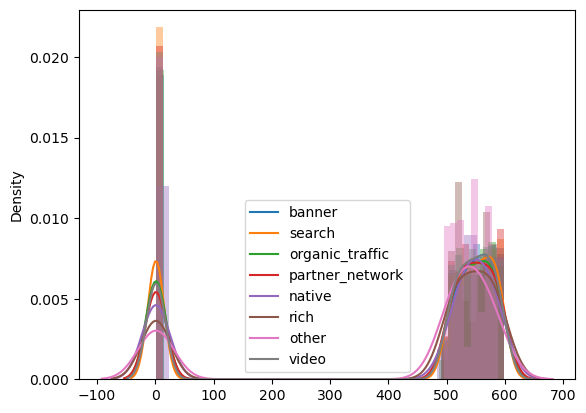

In [23]:
# из графика видно, что количество действий делится на <100, что выглядит правдоподобно, и >500, что довольно странно
sns.distplot(df_alls[df_alls.ad_channel=='banner'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='search'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='organic_traffic'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='partner_network'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='native'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='rich'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='other'].action.values)
sns.distplot(df_alls[df_alls.ad_channel=='video'].action.values)
plt.legend(['banner', 'search', 'organic_traffic','partner_network', 'native', 'rich', 'other', 'video'])

In [24]:
df_no_frauds = df_alls[df_alls.action<100]

In [25]:
df_no_frauds.action.value_counts()

1    986693
2         8
Name: action, dtype: int64

# Гистограмма числа действий, совершаемых пользователями в один момент времени

<Axes: xlabel='action', ylabel='Count'>

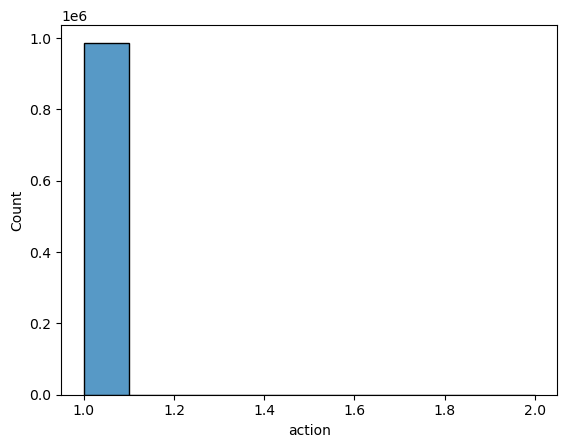

In [26]:
# совсем не видно еще одно значение гистограммы =2
sns.histplot(df_no_frauds.action, bins=10)

# Выделение фродовых данных

In [27]:
# фродовые записи
df_frauds = df_alls[df_alls.action>100].sort_values(by=['action'], ascending=False)
df_frauds

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action
2364059,520693,video,interest,0.75,0.0,iOS,182273,599
1923171,509640,search,interest,1.50,0.0,iOS,176578,599
1923173,509640,search,interest,1.50,0.0,iOS,176578,599
1923174,509640,search,interest,1.50,0.0,Android,176578,599
1923175,509640,search,interest,1.50,0.0,Android,176578,599
...,...,...,...,...,...,...,...,...
2916921,764383,native,interest,2.00,0.0,iOS,189425,499
2916922,764383,native,interest,2.00,0.0,iOS,189425,499
2916923,764383,native,interest,2.00,0.0,iOS,189425,499
2916924,764383,native,interest,2.00,0.0,iOS,189425,499


In [28]:
# процент фродовых данных 
percent_fraud = df_frauds.action.count()/df_alls.action.count()
f'процент фродовых данных: {percent_fraud:.2%}'

'процент фродовых данных: 74.34%'

In [29]:
# процент фродовых пользователей от общего числа пользователей
percent_fraud_user = df_frauds.user_id.nunique()/df_alls.user_id.nunique()
f'процент фродовых пользователей: {percent_fraud_user:.2%}'

'процент фродовых пользователей: 0.82%'

In [30]:
# у канала search действительно оказалось очень много фродовых записей
df_frauds.ad_channel.value_counts()

search             1101662
video               496165
banner              428312
organic_traffic     389581
partner_network     291605
native               85148
rich                 49249
other                17284
Name: ad_channel, dtype: int64

# Перекодировка столбцов os и funnel_stage

In [31]:
# проверка на пропущенные значения
df_no_frauds.isna().sum()

user_id         0
ad_channel      0
funnel_stage    0
price           0
profit          0
os              0
timestamp       0
action          0
dtype: int64

In [32]:
df_no_frauds.os.value_counts()

Android    519607
iOS        467094
Name: os, dtype: int64

In [33]:
# перекодировка os
code_os = df_no_frauds.os.factorize()[0]
df_no_frauds['os_code'] = code_os


C:\Users\Acer\AppData\Local\Temp\ipykernel_4552\865049564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_frauds['os_code'] = code_os


In [34]:
df_no_frauds.funnel_stage.value_counts()

interest         591089
consideration    340106
intent            50629
purchase           4877
Name: funnel_stage, dtype: int64

In [35]:
# перекодировка funnel_stage в зависимости от этапа воронки
a = pd.Categorical(df_no_frauds.funnel_stage, categories=['interest','consideration', 'intent', 'purchase'])
code, unique = pd.factorize(a, sort=True)

In [36]:
df_no_frauds['funnel_stage_code'] = code
df_no_frauds

C:\Users\Acer\AppData\Local\Temp\ipykernel_4552\818465382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_frauds['funnel_stage_code'] = code


,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action,os_code,funnel_stage_code
0,111649,video,consideration,0.75,0.0,Android,150000,1,0,1
1,230119,search,interest,1.50,0.0,iOS,150000,1,1,0
2,399556,search,interest,1.50,0.0,iOS,150000,1,1,0
3,619571,search,consideration,1.50,0.0,iOS,150000,1,1,1
4,897013,organic_traffic,interest,0.00,0.0,Android,150000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3845702,929180,search,intent,1.50,0.0,iOS,224682,1,1,2
3845703,1034498,search,intent,1.50,0.0,iOS,225430,1,1,2
3845704,947521,organic_traffic,consideration,0.00,0.0,Android,225482,1,0,1
3845705,720354,organic_traffic,purchase,0.00,50.0,Android,225495,1,0,3


In [37]:
#матрица корреляции
df_no_frauds.drop(columns=['ad_channel', 'funnel_stage', 'os']).corr()

,user_id,price,profit,timestamp,action,os_code,funnel_stage_code
user_id,1.000000,0.084457,0.022974,0.004881,-0.001730,0.054444,0.045437
price,0.084457,1.000000,0.012591,-0.000552,0.000942,0.235318,0.014425
profit,0.022974,0.012591,1.000000,0.014431,-0.000141,0.006137,0.203725
timestamp,0.004881,-0.000552,0.014431,1.000000,0.001277,0.002126,0.054869
action,-0.001730,0.000942,-0.000141,0.001277,1.000000,0.000865,-0.001556
os_code,0.054444,0.235318,0.006137,0.002126,0.000865,1.000000,0.013031
funnel_stage_code,0.045437,0.014425,0.203725,0.054869,-0.001556,0.013031,1.000000


<Axes: >

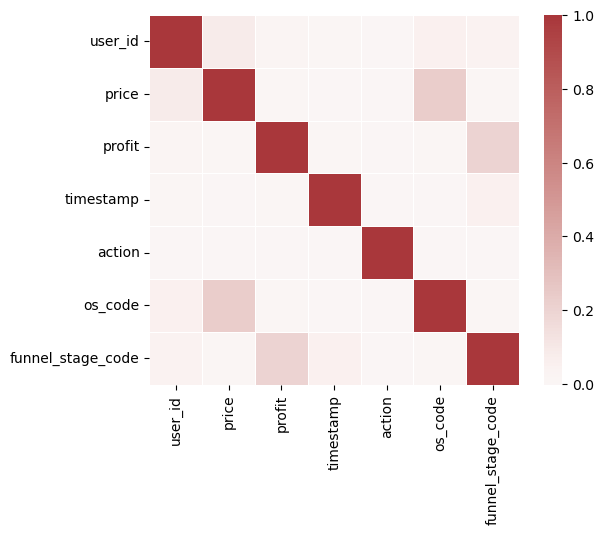

In [38]:
# тепловая карта
sns.heatmap(df_no_frauds.drop(columns=['ad_channel', 'funnel_stage', 'os']).corr(), cmap='vlag', center=0, square=True, linewidths=.5)

In [39]:
# коэффициент корреляции Пирсона между столбцами цены и идентификатора пользователя
st.pearsonr(df_no_frauds.iloc[:, 0], df_no_frauds.iloc[:, 3])

PearsonRResult(statistic=0.08445669336930683, pvalue=0.0)

### Вывод: значение корреляции между столбцами цены и идентификатора пользователя положительное, составляет 0.08, pvalue <5%, значит, зависимость присутствует
### Видна корреляция между ценой рекламы и операционной системой пользователя и между этапом воронки и совершением покупки

# перекодировка столбца ad_channel

In [40]:
labelencoder = LabelEncoder()

In [41]:
X = df_no_frauds.iloc[:, 1]
df_no_frauds['ad_channel_code'] = labelencoder.fit_transform(X)
df_no_frauds

C:\Users\Acer\AppData\Local\Temp\ipykernel_4552\603453823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_frauds['ad_channel_code'] = labelencoder.fit_transform(X)


,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action,os_code,funnel_stage_code,ad_channel_code
0,111649,video,consideration,0.75,0.0,Android,150000,1,0,1,7
1,230119,search,interest,1.50,0.0,iOS,150000,1,1,0,6
2,399556,search,interest,1.50,0.0,iOS,150000,1,1,0,6
3,619571,search,consideration,1.50,0.0,iOS,150000,1,1,1,6
4,897013,organic_traffic,interest,0.00,0.0,Android,150000,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
3845702,929180,search,intent,1.50,0.0,iOS,224682,1,1,2,6
3845703,1034498,search,intent,1.50,0.0,iOS,225430,1,1,2,6
3845704,947521,organic_traffic,consideration,0.00,0.0,Android,225482,1,0,1,2
3845705,720354,organic_traffic,purchase,0.00,50.0,Android,225495,1,0,3,2


In [42]:
df_fact = df_no_frauds.drop(columns=['ad_channel', 'funnel_stage', 'os'])
df_fact

,user_id,price,profit,timestamp,action,os_code,funnel_stage_code,ad_channel_code
0,111649,0.75,0.0,150000,1,0,1,7
1,230119,1.50,0.0,150000,1,1,0,6
2,399556,1.50,0.0,150000,1,1,0,6
3,619571,1.50,0.0,150000,1,1,1,6
4,897013,0.00,0.0,150000,1,0,0,2
...,...,...,...,...,...,...,...,...
3845702,929180,1.50,0.0,224682,1,1,2,6
3845703,1034498,1.50,0.0,225430,1,1,2,6
3845704,947521,0.00,0.0,225482,1,0,1,2
3845705,720354,0.00,50.0,225495,1,0,3,2


In [43]:
df_fact = df_fact.apply(lambda x: pd.factorize(x)[0])
df_fact

,user_id,price,profit,timestamp,action,os_code,funnel_stage_code,ad_channel_code
0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,1
2,2,1,0,0,0,1,1,1
3,3,1,0,0,0,1,0,1
4,4,2,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
3845702,531079,1,0,60718,0,1,2,1
3845703,528703,1,0,60719,0,1,2,1
3845704,516018,2,0,60720,0,0,0,2
3845705,531022,2,5,60721,0,0,3,2


In [44]:
#создание датафрейма без целевой переменной
x= df_fact.drop(columns=['profit'])
y=df_fact.loc[:, 'profit']

### метод Бартлетта

In [45]:
chi_square_value, p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(4727689.8163857525, 0.0)

In [46]:
# стандартизация значений
sc = StandardScaler()

In [47]:
X_sc = sc.fit_transform(x)

In [48]:
factors = FactorAnalyzer(n_factors=3)

In [49]:
factors.fit(X_sc)

FactorAnalyzer(rotation_kwargs={})

In [50]:
ev, v = factors.get_eigenvalues()

<Axes: >

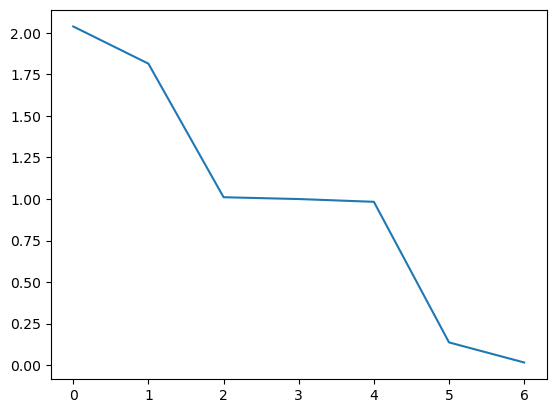

In [51]:
sns.lineplot(data=ev)

In [52]:
# из графика видно, что только 2 фактора имеют значения >1
n_factors=2

In [53]:
factors = FactorAnalyzer(n_factors=n_factors)

In [54]:
factors.fit(X_sc)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

In [55]:
loadings = pd.DataFrame(factors.loadings_, index=x.columns, columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])
loadings.sort_values(by=['factor_1'], ascending=False)

,factor_1,factor_2
price,1.010799,-0.140604
ad_channel_code,0.998908,-0.137547
funnel_stage_code,0.055557,-0.014753
action,0.001522,0.000825
os_code,-0.012143,-0.003435
timestamp,-0.032381,0.868839
user_id,-0.106495,1.009375


### Вывод: 1 фактор связал затраты на рекламу с идентификатором пользователя, у второго связь аналогичная, только противоположная

# Анализ фродовых данных

In [56]:
df_frauds

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action
2364059,520693,video,interest,0.75,0.0,iOS,182273,599
1923171,509640,search,interest,1.50,0.0,iOS,176578,599
1923173,509640,search,interest,1.50,0.0,iOS,176578,599
1923174,509640,search,interest,1.50,0.0,Android,176578,599
1923175,509640,search,interest,1.50,0.0,Android,176578,599
...,...,...,...,...,...,...,...,...
2916921,764383,native,interest,2.00,0.0,iOS,189425,499
2916922,764383,native,interest,2.00,0.0,iOS,189425,499
2916923,764383,native,interest,2.00,0.0,iOS,189425,499
2916924,764383,native,interest,2.00,0.0,iOS,189425,499


In [57]:
df_frauds.groupby(['funnel_stage'], as_index=False).agg({'user_id': 'count'})

,funnel_stage,user_id
0,intent,230282
1,interest,2628724


## Гистограмма фродовых значений в разрезе этапов воронки

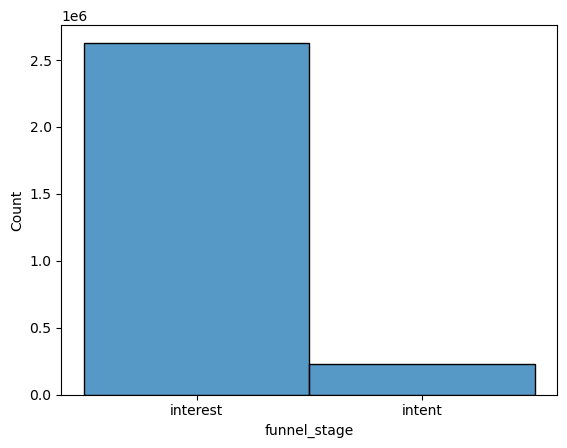

In [58]:
sns.histplot(df_frauds.funnel_stage)
plt.show()

### Самый скомпрометированный этап - это interest. Это логично, поскольку он является самым первым этапом в воронке. Второй канал с фродовыми записями - intent. Предположу, что так случилось потому, что это последний этап перед покупкой.

## Визуализация воронки продаж по всем каналам

In [59]:
#Сводная таблица по всем всем этапам дл каждого канала привлечения
data_pivot = df_no_frauds.pivot_table(
    index='ad_channel',
    columns='funnel_stage',
    values = 'user_id',
    aggfunc='count')
data_pivot

funnel_stage,consideration,intent,interest,purchase
ad_channel,,,,
banner,47541,7625,92003,688
native,12597,412,19381,37
organic_traffic,53592,9163,78706,542
other,1813,232,3216,43
partner_network,24721,4420,66234,450
rich,4657,1238,8922,22
search,134305,27481,224667,3090
video,60880,58,97960,5


In [60]:
# подготовка данных
channel = data_pivot.index
interest = data_pivot.interest
consideration = data_pivot.consideration
intent = data_pivot.intent
purchase = data_pivot.purchase

In [61]:
bar_width = 0.2
index = np.arange(len(channel))

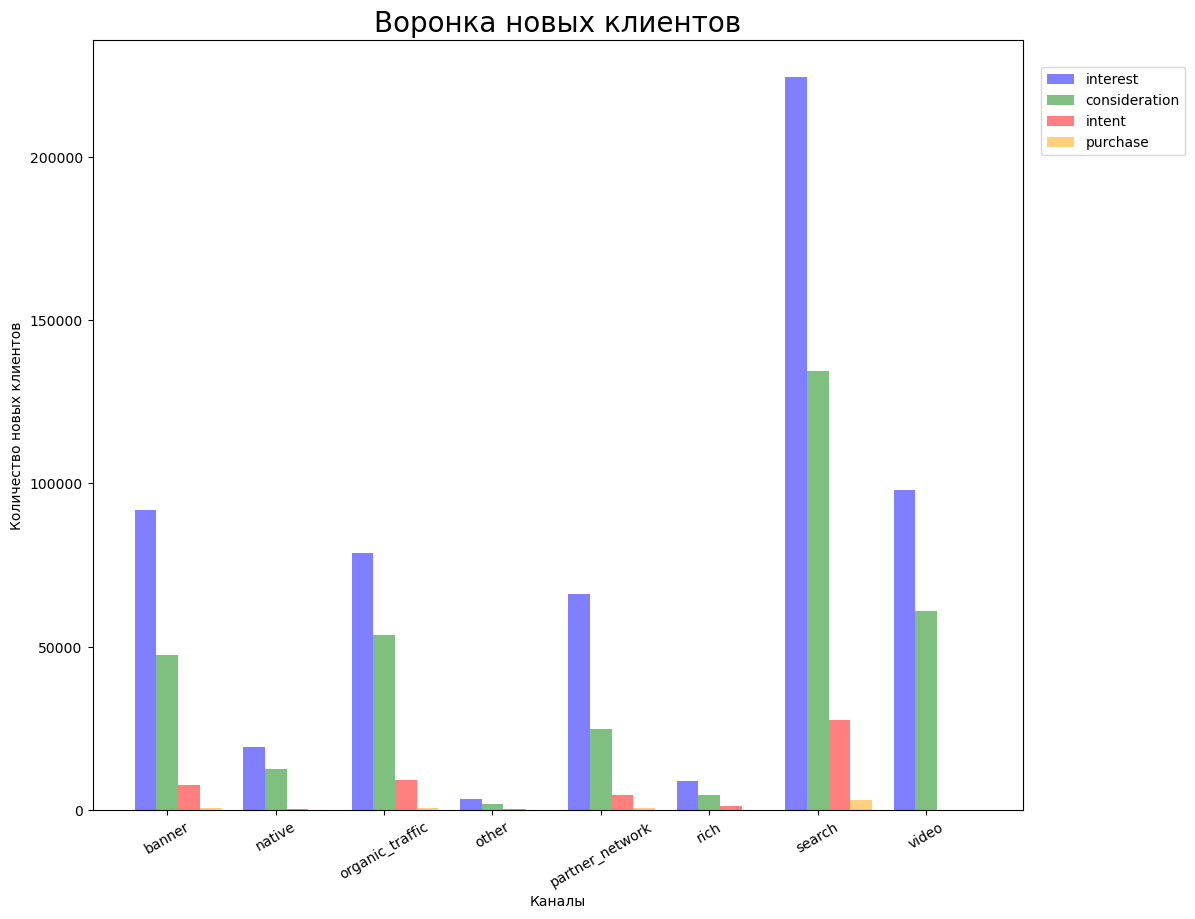

In [62]:
# построение воронки
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(index, interest, bar_width, color='blue', alpha=0.5, label='interest')
ax.bar(index+bar_width, consideration, bar_width, color='green', alpha=0.5, label='consideration')
ax.bar(index+2*bar_width, intent, bar_width, color='red', alpha=0.5, label='intent')
ax.bar(index+3*bar_width, purchase, bar_width, color='orange', alpha=0.5, label='purchase')
ax.set_title('Воронка новых клиентов', fontsize=20)
ax.set_xlabel('Каналы')
ax.set_ylabel('Количество новых клиентов')
ax.set_xticks(index+bar_width)
ax.set_xticklabels(channel)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc=(1.02, 0.85))
plt.show()

### В целом, все каналы работают и приносят клиентов. Канал video я бы выделила, как наименее перспективный, при хорошем привлечении на первых двух этапах воронки, очень маленькое количество клиентов  совершили покупку. Но, возможно, дело в пути, который проходит клиент, и есть какие-то сложности, которые не позволяют закончить покупку
### С другой стороны, есть 3 канала с наименьшим количеством привлеченных клиентов. Это каналы native, rich и other

## Затраты на рекламу и прибыль последного этапа воронки для каждого канала привлечения

In [63]:
# Последний этап воронки
df_purchase = df_no_frauds[df_no_frauds.funnel_stage=='purchase']
df_purchase

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action,os_code,funnel_stage_code,ad_channel_code
41,890248,partner_network,purchase,1.0,2136.0,Android,150003,1,0,3,4
979,941001,search,purchase,1.5,520.0,iOS,150029,1,1,3,6
1340,727830,search,purchase,1.5,1099.0,Android,150059,1,0,3,6
1503,638226,search,purchase,1.5,1099.0,iOS,150072,1,1,3,6
4261,962335,search,purchase,1.5,2136.0,iOS,150117,1,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...
3845690,152432,search,purchase,1.5,2136.0,Android,222568,1,0,3,6
3845691,750226,organic_traffic,purchase,0.0,260.0,Android,222773,1,0,3,2
3845697,104960,organic_traffic,purchase,0.0,520.0,iOS,223361,1,1,3,2
3845701,749577,search,purchase,1.5,2136.0,iOS,224647,1,1,3,6


In [64]:
# подсчет расходов на рекламу и прибыли по всем каналам
df_adv_count = df_no_frauds.groupby('ad_channel', as_index=False).agg(expenses = ('price', 'sum'))
df_purchase_count = df_purchase.groupby('ad_channel', as_index=False).agg(
    revenue = ('profit','sum')
)
df_rev_exp = df_purchase_count.merge(df_adv_count, on='ad_channel')
df_rev_exp

,ad_channel,revenue,expenses
0,banner,497881.0,73928.50
1,native,37355.0,64854.00
2,organic_traffic,367094.0,0.00
3,other,28354.0,0.00
4,partner_network,445411.0,95825.00
5,rich,33511.0,37097.50
6,search,2112193.0,584314.50
7,video,4582.0,119177.25


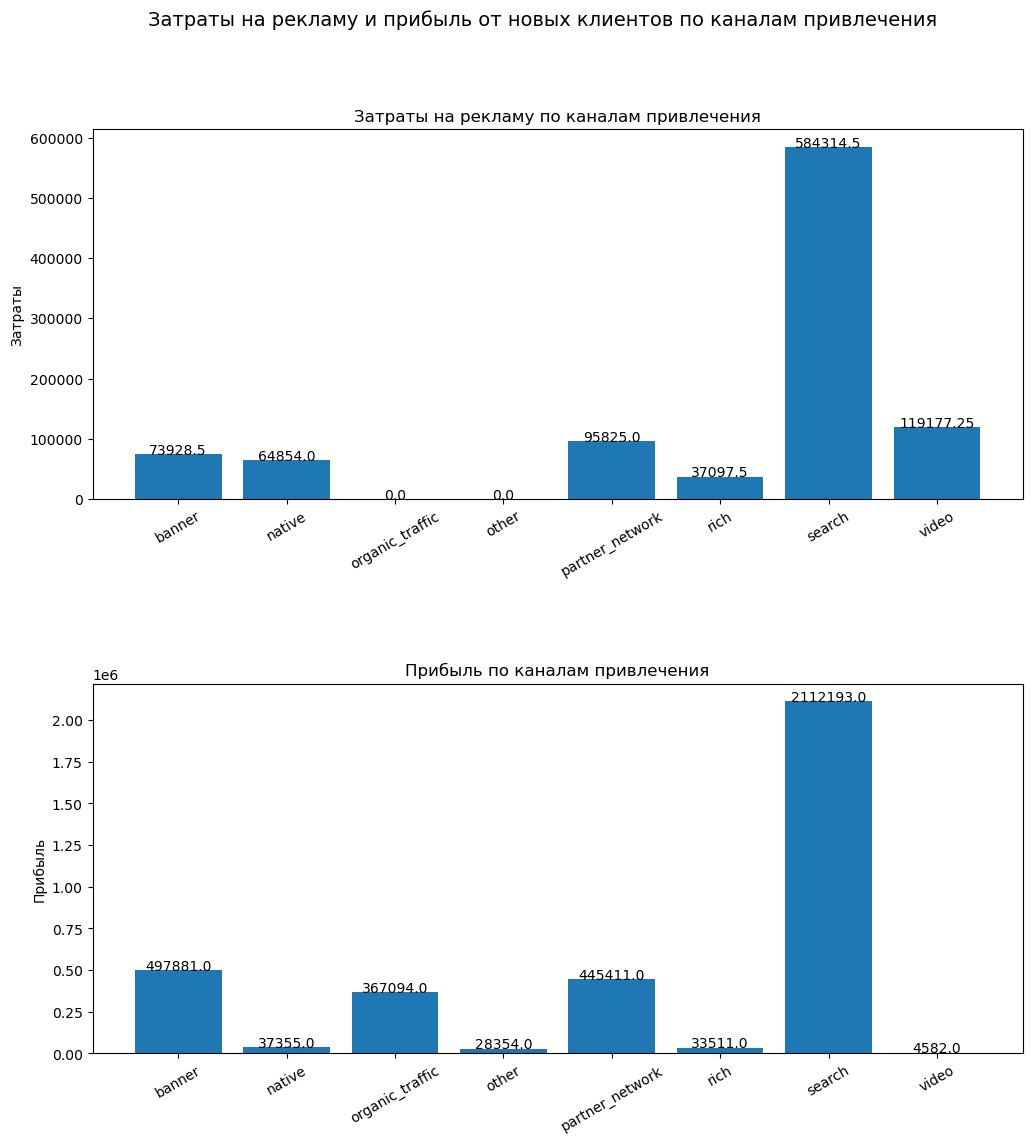

In [65]:
# визуализация на одном фрейме графика расходов на рекламу и прибыли, полученной от каждого канала
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
fig.suptitle('Затраты на рекламу и прибыль от новых клиентов по каналам привлечения', fontsize=14)
fig.subplots_adjust(hspace=0.5)

ax[0].bar(df_rev_exp.ad_channel, df_rev_exp.expenses)
ax[0].set_title('Затраты на рекламу по каналам привлечения')
ax[0].tick_params(axis='x', labelrotation=30)
ax[0].set_ylabel('Затраты')
for i, val in enumerate(df_rev_exp['expenses']):
    ax[0].text(i, val+20, str(val), ha='center')
    
ax[1].bar(df_rev_exp.ad_channel, df_rev_exp.revenue)
ax[1].set_title('Прибыль по каналам привлечения')
ax[1].tick_params(axis='x', labelrotation=30)
ax[1].set_ylabel('Прибыль')
for i, val in enumerate(df_rev_exp['revenue']):
    ax[1].text(i, val+20, str(val), ha='center')
plt.show()

## Операционная система пользователя по каналам

In [66]:
# количество пользователей по каждой операционной системе в разрезе каналов
df_os = df_no_frauds.groupby(['ad_channel','os'], as_index=False).agg(user_count=('user_id','count'))
df_os

,ad_channel,os,user_count
0,banner,Android,103544
1,banner,iOS,44313
2,native,Android,9884
3,native,iOS,22543
4,organic_traffic,Android,85334
5,organic_traffic,iOS,56669
6,other,Android,3214
7,other,iOS,2090
8,partner_network,Android,47911
9,partner_network,iOS,47914


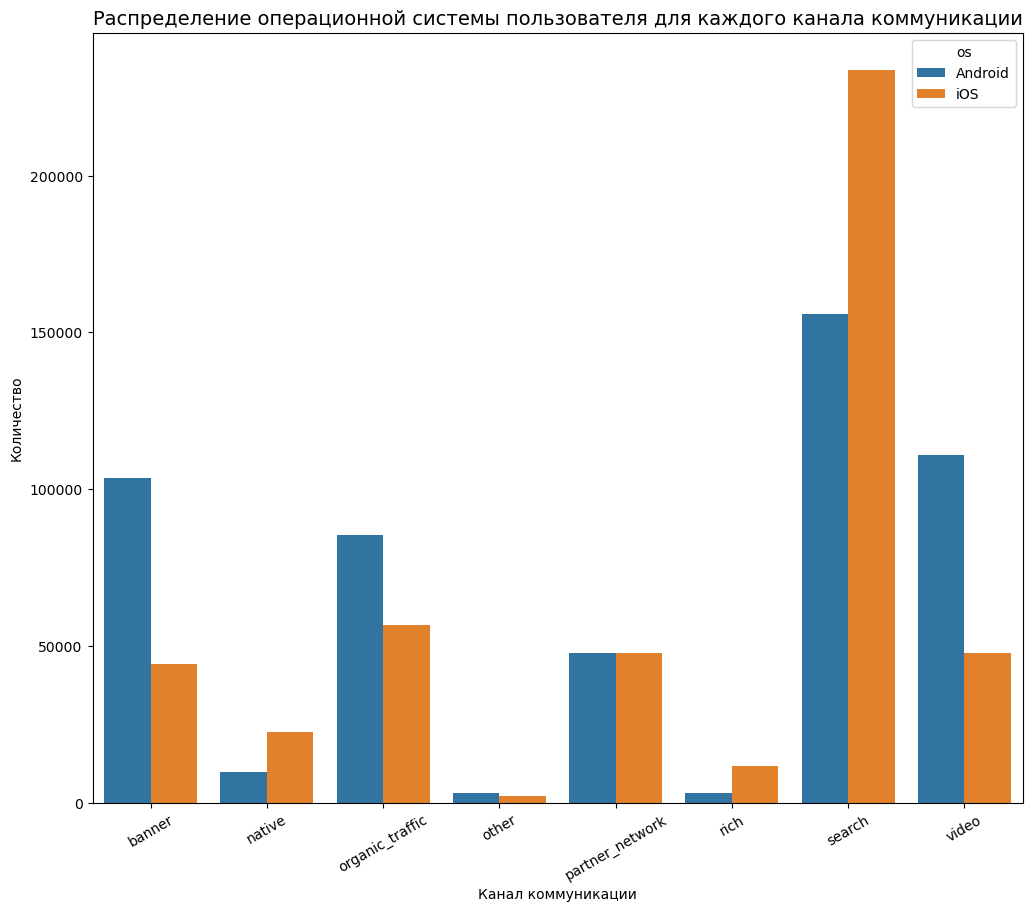

In [67]:
# Визуализация распределения операционной системы для каждого канала коммуникации
plt.figure(figsize=(12,10))
sns.barplot(x='ad_channel', y='user_count', data=df_os, hue='os')
plt.title('Распределение операционной системы пользователя для каждого канала коммуникации', fontsize=14)
plt.xticks(rotation=30)
plt.xlabel('Канал коммуникации')
plt.ylabel('Количество')
plt.show()

In [68]:
# соотношение типа операционной системы для последнего этапа воронки
df_purchase_os = df_purchase.groupby(['ad_channel','os'], as_index=False).agg(user_count = ('user_id','count'))
df_purchase_os

,ad_channel,os,user_count
0,banner,Android,481
1,banner,iOS,207
2,native,Android,9
3,native,iOS,28
4,organic_traffic,Android,308
5,organic_traffic,iOS,234
6,other,Android,31
7,other,iOS,12
8,partner_network,Android,228
9,partner_network,iOS,222


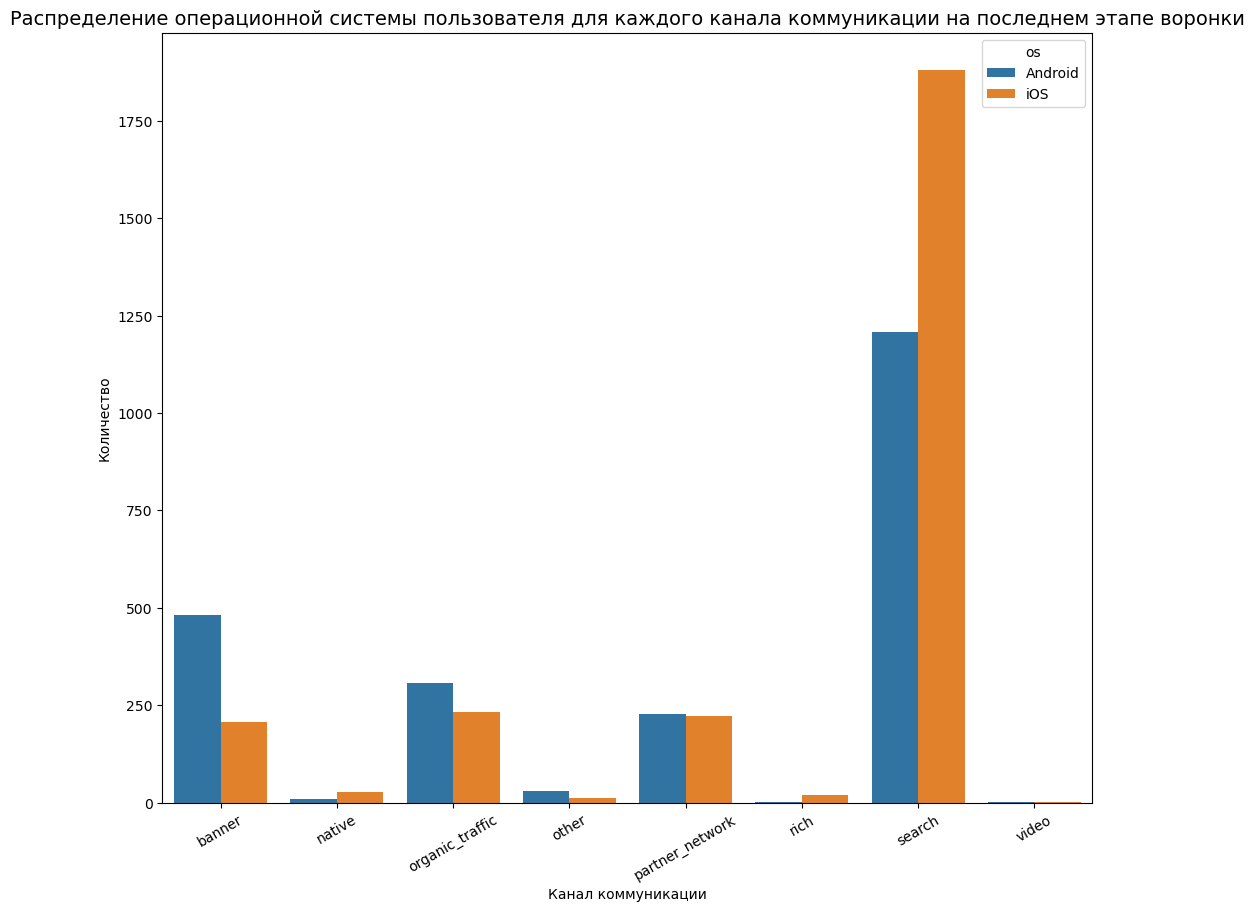

In [69]:
# тот же график распределения, но только для последнего этапа воронки

plt.figure(figsize=(12,10))
sns.barplot(x='ad_channel', y='user_count', data=df_purchase_os, hue='os')
plt.title('Распределение операционной системы пользователя для каждого канала коммуникации на последнем этапе воронки', fontsize=14)
plt.xticks(rotation=30)
plt.xlabel('Канал коммуникации')
plt.ylabel('Количество')
plt.show()

### Вывод: как видно, соотношение типа операционной системы для последнего этапа воронки не отличается от соотношения для всей воронки, за исключением канала video. Значит, тип операционной системы, в большинстве своем, не влияет на покупательную способность

# Деление трафика на органический и платный

In [70]:
df_organic = df_no_frauds[df_no_frauds.price==0]
df_paid =df_no_frauds[df_no_frauds.price!=0]

In [71]:
df_organic

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action,os_code,funnel_stage_code,ad_channel_code
4,897013,organic_traffic,interest,0.0,0.0,Android,150000,1,0,0,2
5,242700,organic_traffic,interest,0.0,0.0,Android,150000,1,0,0,2
6,143856,organic_traffic,interest,0.0,0.0,Android,150000,1,0,0,2
7,26717,organic_traffic,consideration,0.0,0.0,Android,150000,1,0,1,2
18,286799,organic_traffic,interest,0.0,0.0,Android,150001,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
3845691,750226,organic_traffic,purchase,0.0,260.0,Android,222773,1,0,3,2
3845697,104960,organic_traffic,purchase,0.0,520.0,iOS,223361,1,1,3,2
3845699,706604,organic_traffic,intent,0.0,0.0,iOS,223417,1,1,2,2
3845704,947521,organic_traffic,consideration,0.0,0.0,Android,225482,1,0,1,2


In [72]:
df_paid

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp,action,os_code,funnel_stage_code,ad_channel_code
0,111649,video,consideration,0.75,0.0,Android,150000,1,0,1,7
1,230119,search,interest,1.50,0.0,iOS,150000,1,1,0,6
2,399556,search,interest,1.50,0.0,iOS,150000,1,1,0,6
3,619571,search,consideration,1.50,0.0,iOS,150000,1,1,1,6
8,991236,native,interest,2.00,0.0,Android,150000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3845700,501946,search,intent,1.50,0.0,Android,224125,1,0,2,6
3845701,749577,search,purchase,1.50,2136.0,iOS,224647,1,1,3,6
3845702,929180,search,intent,1.50,0.0,iOS,224682,1,1,2,6
3845703,1034498,search,intent,1.50,0.0,iOS,225430,1,1,2,6


In [73]:

df_organic_count = df_organic.groupby('funnel_stage', as_index=False).agg(user_count_organic=('user_id', 'count'))
df_organic_count = df_organic_count.sort_values(by=['user_count_organic'], ascending=False)

In [74]:
df_organic_count['percent_organic'] = df_organic_count['user_count_organic']/df_organic_count['user_count_organic'].shift()*100
df_organic_count

,funnel_stage,user_count_organic,percent_organic
2,interest,81922,NaN
0,consideration,55405,67.631405
1,intent,9395,16.956953
3,purchase,585,6.226716


In [75]:
df_paid_count = df_paid.groupby('funnel_stage', as_index=False).agg(user_count_paid=('user_id', 'count'))
df_paid_count = df_paid_count.sort_values(by=['user_count_paid'], ascending=False)
df_paid_count['percent_paid'] = df_paid_count['user_count_paid']/df_paid_count['user_count_paid'].shift()*100
df_paid_count

,funnel_stage,user_count_paid,percent_paid
2,interest,509167,NaN
0,consideration,284701,55.915053
1,intent,41234,14.483265
3,purchase,4292,10.408886


In [76]:
# Получение уникальных этапов воронки

stages = set(df_no_frauds['funnel_stage'].unique())

for stage in stages:

    # Подсчет числа пользователей на каждом этапе воронки в каждой группе

    count_rek = df_paid[df_paid['funnel_stage'] == stage]['user_id'].count()

    count_org = df_organic[df_organic['funnel_stage'] == stage]['user_id'].count()

    # Подсчет общего числа пользователей в каждой группе

    total_rek = len(df_paid)

    total_org = len(df_organic)

    # Применение z-теста для каждого этапа воронки

    z_stat, p_value = proportions_ztest([count_rek, count_org], [total_rek, total_org])

    print(f"Этап воронки: {stage}")

    print("Z-статистика:", z_stat, "p-значение:", p_value)

Этап воронки: intent
Z-статистика: -23.51332174115768 p-значение: 2.9804448910794694e-122
Этап воронки: interest
Z-статистика: 36.44634058868925 p-значение: 7.861733169092164e-291
Этап воронки: consideration
Z-статистика: -27.518041153865447 p-значение: 1.0681001727483113e-166
Этап воронки: purchase
Z-статистика: 5.7640511881225605 p-значение: 8.211849116285162e-09


### на каждом этапе воронки различия между платным и органическим набором данных статистически значимы

# Воронки продаж для каждого канала

In [77]:
df_paid_pivot = df_paid.pivot_table(
    index= 'funnel_stage',
    columns='ad_channel',
    values='user_id',
    aggfunc='count')
df_paid_pivot = df_paid_pivot.sort_values(by=['banner'], ascending=False)
df_paid_pivot

ad_channel,banner,native,partner_network,rich,search,video
funnel_stage,,,,,,
interest,92003,19381,66234,8922,224667,97960
consideration,47541,12597,24721,4657,134305,60880
intent,7625,412,4420,1238,27481,58
purchase,688,37,450,22,3090,5


In [81]:
pivot_copy = df_paid_pivot.copy()
for column in pivot_copy.columns:
    pivot_copy[column] = (pivot_copy[column]/pivot_copy[column].sum()*100).round(3)
pivot_copy

ad_channel,banner,native,partner_network,rich,search,video
funnel_stage,,,,,,
interest,62.224,59.768,69.120,60.125,57.675,61.648
consideration,32.153,38.847,25.798,31.384,34.478,38.313
intent,5.157,1.271,4.613,8.343,7.055,0.037
purchase,0.465,0.114,0.470,0.148,0.793,0.003


### Есть ли различия в воронках по каналам?

In [117]:
# с точки зрения всей таблицы данные по канадам статистически не различимы
st.chi2_contingency(pivot_copy)

Chi2ContingencyResult(statistic=17.905621342878963, pvalue=0.2676598472129539, dof=15, expected_freq=array([[61.75917654, 61.75979413, 61.76041173, 61.75979413, 61.76041173,
        61.76041173],
       [33.49505339, 33.49538835, 33.4957233 , 33.49538835, 33.4957233 ,
        33.4957233 ],
       [ 4.41260783,  4.41265196,  4.41269608,  4.41265196,  4.41269608,
         4.41269608],
       [ 0.33216224,  0.33216556,  0.33216888,  0.33216556,  0.33216888,
         0.33216888]]))

### Посмотрим каналы между собой на наличие различия

In [123]:
def hi_2(df):   
    return st.chi2_contingency(df)

In [127]:
data = pivot_copy.columns
for i in range(len(data)):
    for j in range(i+1,len(data)):
        df= pivot_copy.loc[:,[data[i],data[j]]]
        hi_2_stats = hi_2(df)
        if hi_2_stats[1]<0.05 and hi_2_stats[0]>7.815:
            print( f' статистические pазличия между {data[i]} и {data[j]} есть')

 статистические pазличия между partner_network и video есть
 статистические pазличия между rich и video есть
 статистические pазличия между search и video есть


### статистические различия наблюдаются у нескольких пар каналов ['partner_network', 'video'],['rich', 'video'], ['search', 'video']. Все пары имеют общий канал video.

## Визуализация каналов по разным этапам воронки

In [81]:
interest_stage = pivot_copy.sort_values(by='interest', ascending=False)
consideration_stage = pivot_copy.consideration.sort_values()
intent_stage = pivot_copy.intent.sort_values()
purchase_stage = pivot_copy.purchase.sort_values()

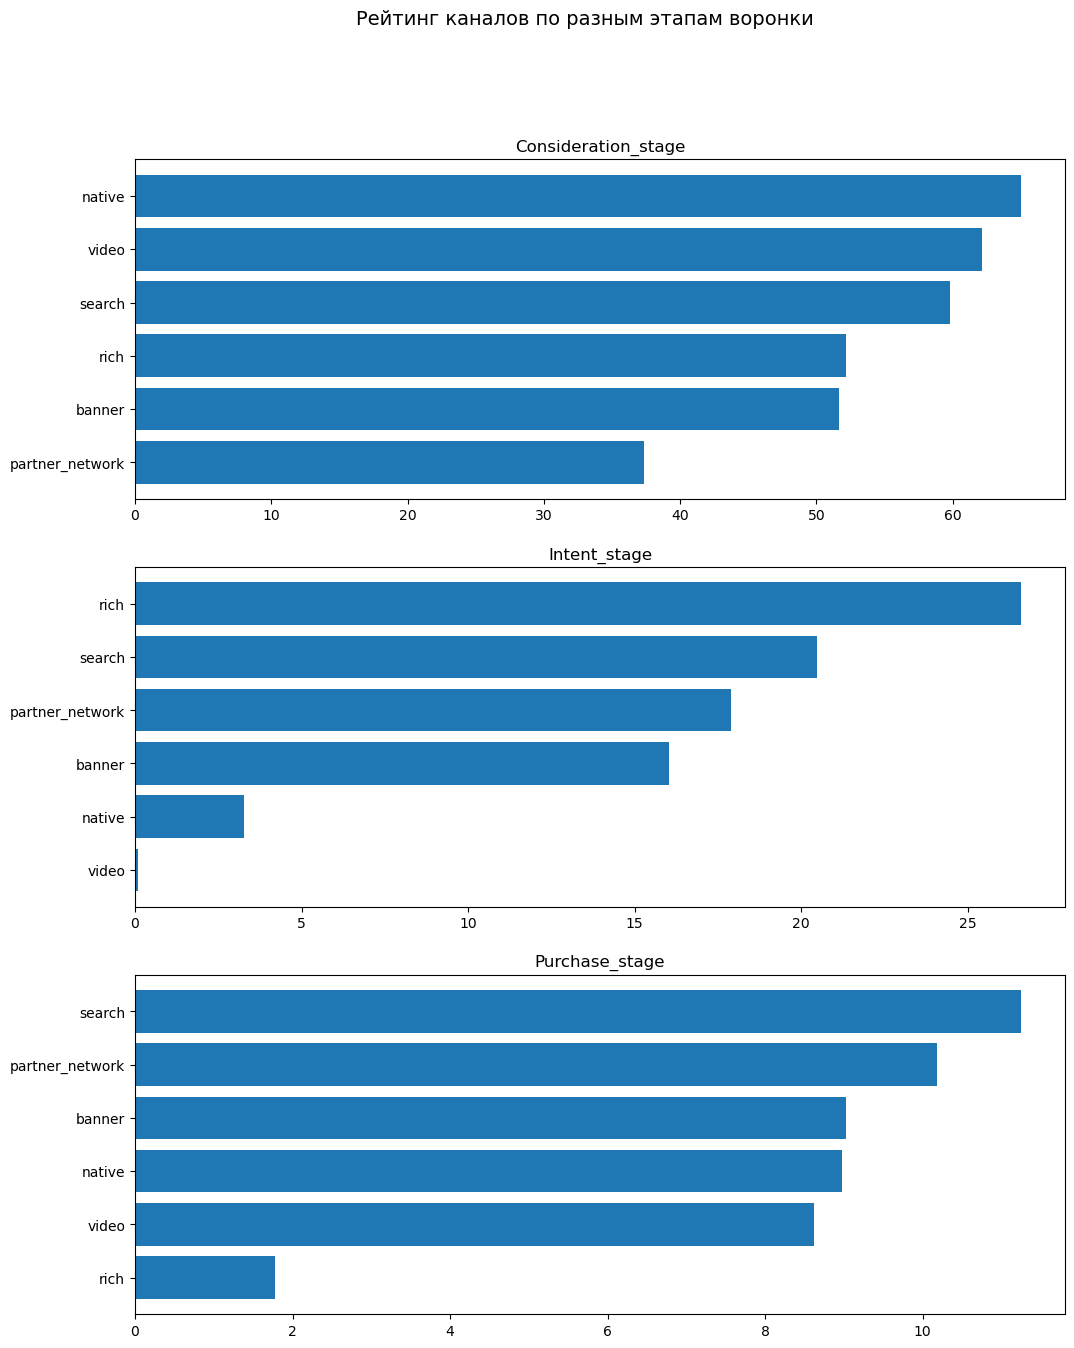

In [82]:
# гистограмму по каждому каналу на каждом этапе воронки
fig, ax = plt.subplots(3, 1, figsize=(12,15))
plt.suptitle('Рейтинг каналов по разным этапам воронки', fontsize=14)
ax[0].barh(consideration_stage.index, consideration_stage.values)
ax[0].set_title('Consideration_stage')
ax[1].barh(intent_stage.index, intent_stage.values)
ax[1].set_title('Intent_stage')
ax[2].barh(purchase_stage.index, purchase_stage.values)
ax[2].set_title('Purchase_stage')

plt.show()

### По этапу consideration лучший канал native и video конверсия >60%, худший - partner_network, конверсия < 40%.
### На этапе intent все резко меняется и из лучших native и video становятся худшими каналами с показателем конверсии < 5%. Лучший канал этого этапа rich
### Завершающий этап purchase. Худший канал rich (<2%), а лучший search. 

# Расчет показателей рентабельности каналов привлечения

## Расчет ROMI

In [83]:
df_rev_exp = df_rev_exp[df_rev_exp.expenses!=0]
df_rev_exp['ROMI'] = ((df_rev_exp['revenue']-df_rev_exp['expenses'])/df_rev_exp['expenses']*100).round(2)
df_rev_exp_romi = df_rev_exp.sort_values(by='ROMI', ascending=False)
df_rev_exp_romi

C:\Users\Acer\AppData\Local\Temp\ipykernel_9108\2357432493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev_exp['ROMI'] = ((df_rev_exp['revenue']-df_rev_exp['expenses'])/df_rev_exp['expenses']*100).round(2)


,ad_channel,revenue,expenses,ROMI
0,banner,497881.0,73928.50,573.46
4,partner_network,445411.0,95825.00,364.82
6,search,2112193.0,584314.50,261.48
5,rich,33511.0,37097.50,-9.67
1,native,37355.0,64854.00,-42.40
7,video,4582.0,119177.25,-96.16


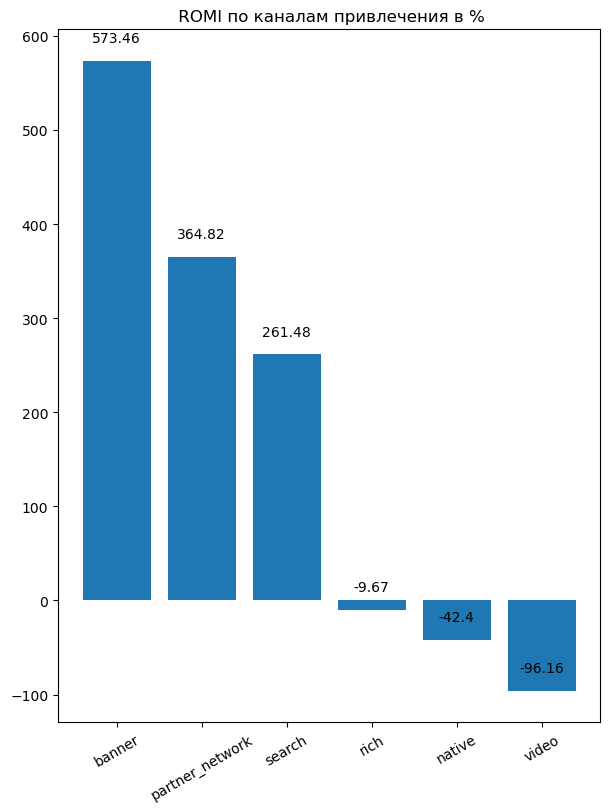

In [84]:
plt.figure(figsize=(7,9))
plt.bar(df_rev_exp_romi.ad_channel, df_rev_exp_romi.ROMI)
plt.xticks(rotation=30)
plt.title(' ROMI по каналам привлечения в %')
for i, val in enumerate(df_rev_exp_romi['ROMI']):
    plt.text(i, val+20, str(val), ha='center')
plt.show()

## Расчет ROAS 

In [85]:
df_rev_exp = df_rev_exp[df_rev_exp.expenses!=0]
df_rev_exp['ROAS'] = (df_rev_exp['revenue']/df_rev_exp['expenses']*100).round(2)
df_rev_exp_roas = df_rev_exp.sort_values(by='ROAS', ascending=False)
df_rev_exp_roas

,ad_channel,revenue,expenses,ROMI,ROAS
0,banner,497881.0,73928.50,573.46,673.46
4,partner_network,445411.0,95825.00,364.82,464.82
6,search,2112193.0,584314.50,261.48,361.48
5,rich,33511.0,37097.50,-9.67,90.33
1,native,37355.0,64854.00,-42.40,57.60
7,video,4582.0,119177.25,-96.16,3.84


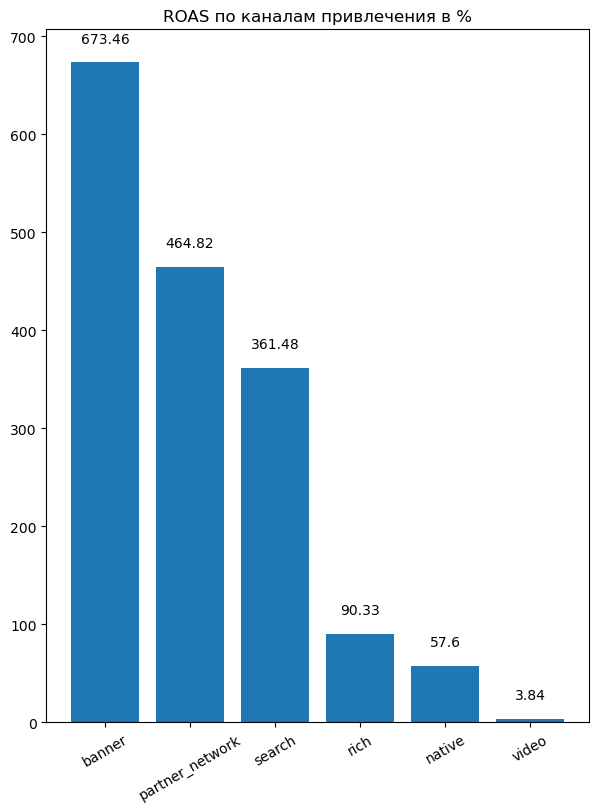

In [86]:
plt.figure(figsize=(7,9))
plt.bar(df_rev_exp_roas.ad_channel, df_rev_exp_roas.ROAS)
plt.xticks(rotation=30)
plt.title('ROAS по каналам привлечения в %')
for i, val in enumerate(df_rev_exp_roas['ROAS']):
    plt.text(i, val+20, str(val), ha='center')
plt.show()

### Метрики ROMI и ROAS показывают окупаемость затрат на рекламу. Из графиков видно, что 3 канала не окупили вложенных в них средств. Это rich, native и video. Хуже всего себя проявил канал video. У него самый низкий показатель конверсии в целом по всем каналам, как и % окупаемости.Целесообразнее всего отключить именно канал video. Перераспределить показы можно между 3-мя каналами стабильно приносящими прибыль. это каналы banner, search и partner_network. У всех трех каналов стабильная конверсия около 50% на каждом этапе, высокий уровень окупаемости вложенных средств

In [128]:
!jupyter nbconvert --to html аналитика_данных_в_маркетинге.ipynb

[NbConvertApp] Converting notebook аналитика_данных_в_маркетинге.ipynb to html
[NbConvertApp] Writing 1496362 bytes to аналитика_данных_в_маркетинге.html


In [ ]:
st.chisquare